# Robustness Analyses

This notebook examines the robustness of the five strategies found in the direct search. Again, a PRIM analysis is performed. This is done separately for each policy. We consider a policy to be robust if the found box contains far fewer experiments than the 6259 experiments found in the case of the zero policy. 

For a complete overview, the first part plots the five final policies and their policy name. 

In [2]:
# Import dependencies
import pandas as pd
from ema_workbench import load_results
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ema_workbench.analysis.prim as prim
from ema_workbench.analysis import dimensional_stacking, parcoords

In [62]:
final_name = "data/5_best_policies.csv"
final_policies = pd.read_csv(final_name)
final_policies = final_policies.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'policy_name']]
final_policies



,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,policy_name
0,0.000000e+00,2.029929e+07,213300000.0,policy_34
1,3.867582e+06,0.000000e+00,455700000.0,policy_138
2,3.712002e+07,7.332080e+06,92100000.0,policy_133
3,1.504282e+07,0.000000e+00,213300000.0,policy_13
4,3.633646e+06,2.640338e+07,30700000.0,policy_157


<Figure size 1200x800 with 0 Axes>

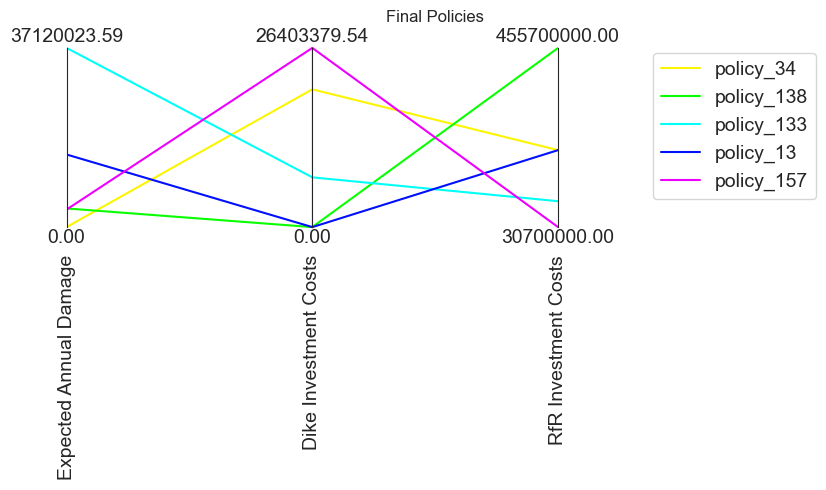

In [63]:
final_policies.set_index('policy_name', inplace=True)

colors = sns.color_palette("hsv", 5)

plt.figure(figsize=(12, 8))
limits = parcoords.get_limits(final_policies)
axes = parcoords.ParallelAxes(limits)

# Plot with a legend
for i, (index, row) in enumerate(final_policies.iterrows()):
    axes.plot(row.to_frame().T, label=str(index), color=colors[i])

plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
axes.legend()
plt.title('Final Policies')
plt.show()

### Robustness Analysis for Policy 13

In [17]:
# Load the results
file_name_p13 = "data/dike_model_results_policy_policy_13.tar.gz"
experiments_p13, outcomes_p13 = load_results(file_name_p13)

In [18]:
outcomes_p13

{'Expected Annual Damage': array([2.84661708e+09, 2.53139815e+09, 6.34322842e+08, ...,
        2.62875428e+07, 2.17090068e+09, 3.33266477e+09]),
 'Dike Investment Costs': array([3.06083795e+08, 3.06083795e+08, 3.06083795e+08, ...,
        3.06083795e+08, 3.06083795e+08, 3.06083795e+08]),
 'RfR Investment Costs': array([2.133e+08, 2.133e+08, 2.133e+08, ..., 2.133e+08, 2.133e+08,
        2.133e+08]),
 'Expected Number of Deaths': array([0.23186232, 0.23656015, 0.05132699, ..., 0.00162979, 0.23627278,
        0.23008287])}

In [19]:
experiments_p13.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,79,123.199572,1.5,0.001801,318.967054,1.5,0.840210,62.952644,10.0,0.707598,...,0,0,0,0,2,5,7,60000,policy_13,dikesnet
1,104,110.612614,10.0,0.232077,103.870357,1.5,0.877678,120.044924,1.5,0.236140,...,0,0,0,0,2,5,7,60001,policy_13,dikesnet
2,132,38.354741,10.0,0.431692,144.983587,1.0,0.081090,145.211081,1.5,0.818704,...,0,0,0,0,2,5,7,60002,policy_13,dikesnet
3,92,321.587609,1.5,0.946726,307.711348,1.0,0.841706,339.328162,10.0,0.812799,...,0,0,0,0,2,5,7,60003,policy_13,dikesnet
4,46,115.125910,1.0,0.470814,332.658607,1.5,0.719099,71.261231,1.5,0.075232,...,0,0,0,0,2,5,7,60004,policy_13,dikesnet


In [20]:
experiments_p13.shape

(20000, 53)

In [21]:
experiments_cleaned_p13 = experiments_p13.iloc[:, :19]

In [22]:
experiments_cleaned_p13.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2'],
      dtype='object')

In [23]:
damage_data = outcomes_p13['Expected Annual Damage']
casualties_data = outcomes_p13['Expected Number of Deaths']

damage_threshold = np.percentile(damage_data, 85)
casualties_threshold = np.percentile(casualties_data, 90)

# Create a combined condition
combined_condition = (damage_data > damage_threshold) & (casualties_data > casualties_threshold)

# Perform PRIM analysis using the combined condition
prim_alg = prim.Prim(experiments_cleaned_p13, combined_condition, threshold=0.2)
boxes_p13 = prim_alg.find_box()

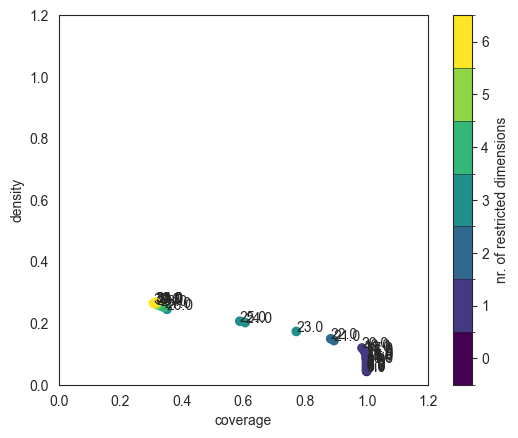

In [24]:
boxes_p13.show_tradeoff(annotated=True)
plt.show()

As the graph above shows, for the same constraints set for the target variables Annual Expected Damage and Annual Number of Deaths as during open exploration, the boxed found have a really low density. This indicates that there are not that many experiments that the comply with the contraints set for the target variables. We therefore decided to lower the constraints to 75% for both target variables and see what these results will do. 

In [25]:
damage_data = outcomes_p13['Expected Annual Damage']
casualties_data = outcomes_p13['Expected Number of Deaths']

damage_threshold = np.percentile(damage_data, 75)
casualties_threshold = np.percentile(casualties_data, 75)

# Create a combined condition
combined_condition = (damage_data > damage_threshold) & (casualties_data > casualties_threshold)

# Perform PRIM analysis using the combined condition
prim_alg = prim.Prim(experiments_cleaned_p13, combined_condition, threshold=0.7)
boxes_p13 = prim_alg.find_box()

C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '126.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible 

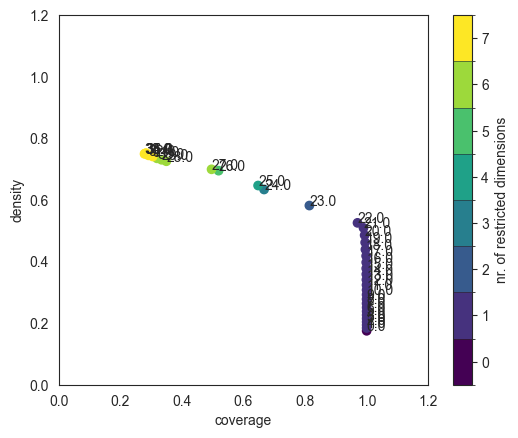

In [26]:
boxes_p13.show_tradeoff(annotated=True)
plt.show()

In [27]:
point_p13 = 25
boxes_p13.inspect(point_p13)

coverage       0.647529
density        0.646790
id            25.000000
k           2267.000000
mass           0.175250
mean           0.646790
n           3505.000000
res_dim        4.000000
Name: 25, dtype: float64

                                  box 25                                 \
                                     min              max      qp value   
A.1_pfail                       0.000042         0.323206           NaN   
discount rate 2          {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  2.453716e-13   
discount rate 1          {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  3.823076e-11   
A.0_ID flood wave shape                7              132  5.722062e-02   

                                  
                        qp value  
A.1_pfail                    0.0  
discount rate 2              NaN  
discount rate 1              NaN  
A.0_ID flood wave shape      NaN  


C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

The PRIM analysis reveals boxes with higher values for density, which is a desirable result. If we select a box with similar values for coverage and density as we did for open exploration, both between 60% and 70%, we observe that the number of experiments in this box (3505) is significantly lower than the number of experiments in the open exploration box (6259) where no policy was implemented.

This indicates that the implementation of policy 13 reduces the likelihood of scenarios falling within the top 25% of expected annual damages and expected annual deaths. Moreover, the difference between policy 13 and no policy is actually larger than the difference between 6259 and 3505 experiments. The 6259 experiments occur under constraints of 85% for damages and 90% for deaths. If the constraint is set to 75% for both target variables, the number of experiments in this box would exceed 6259, further increasing the difference between implementing policy 13 and no policy.

Therefore, this analysis demonstrates the robustness of policy 13.

For the other 4 policies we will again set the constraints to 75% for both target variables and we will choose boxes with a coverage and density between 60% and 70%. We will use the number of experiments within the box as a measure for robustness.  

### Robustness Analysis for Policy 34

In [28]:
file_name_p34 = "data/dike_model_results_policy_policy_34.tar.gz"
experiments_p34, outcomes_p34 = load_results(file_name_p34)

In [29]:
experiments_cleaned_p34 = experiments_p34.iloc[:, :19]

In [30]:
damage_data = outcomes_p34['Expected Annual Damage']
casualties_data = outcomes_p34['Expected Number of Deaths']

damage_threshold = np.percentile(damage_data, 75)
casualties_threshold = np.percentile(casualties_data, 75)

# Create a combined condition
combined_condition = (damage_data > damage_threshold) & (casualties_data > casualties_threshold)

# Perform PRIM analysis using the combined condition
prim_alg = prim.Prim(experiments_cleaned_p34, combined_condition, threshold=0.7)
boxes_p34 = prim_alg.find_box()

C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '126.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '126.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '126.5' has dtype incompatible with int64, please explicitly cast to a compati

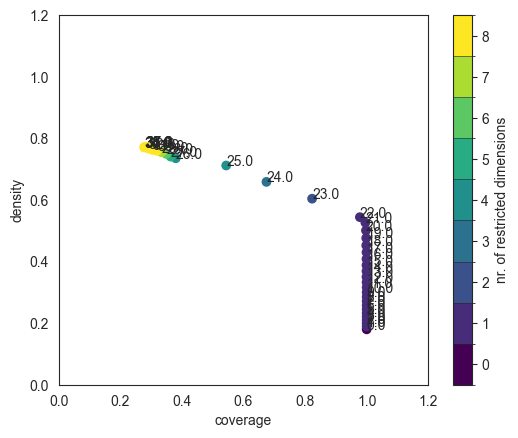

In [31]:
boxes_p34.show_tradeoff(annotated=True)
plt.show()

In [32]:
point_p34 = 24
boxes_p34.inspect(point_p34)

coverage       0.674638
density        0.658523
id            24.000000
k           2426.000000
mass           0.184200
mean           0.658523
n           3684.000000
res_dim        3.000000
Name: 24, dtype: float64

                          box 24                                        
                             min              max      qp value qp value
A.1_pfail               0.000042         0.323206           NaN      0.0
discount rate 2  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  4.201136e-14      NaN
discount rate 1  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  4.878553e-12      NaN


C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

Also for policy 34 the number of experiments within the box is relatively low (3684). It can again be concluded that policy 34 is a robust policy according to this analysis. 

### Robustness Analysis for Policy 133

In [33]:
file_name_p133 = "data/dike_model_results_policy_policy_133.tar.gz"
experiments_p133, outcomes_p133 = load_results(file_name_p133)

In [34]:
experiments_cleaned_p133 = experiments_p133.iloc[:, :19]

In [35]:
damage_data = outcomes_p133['Expected Annual Damage']
casualties_data = outcomes_p133['Expected Number of Deaths']

damage_threshold = np.percentile(damage_data, 75)
casualties_threshold = np.percentile(casualties_data, 75)

# Create a combined condition
combined_condition = (damage_data > damage_threshold) & (casualties_data > casualties_threshold)

# Perform PRIM analysis using the combined condition
prim_alg = prim.Prim(experiments_cleaned_p133, combined_condition, threshold=0.7)
boxes_p133 = prim_alg.find_box()

C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '126.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible 

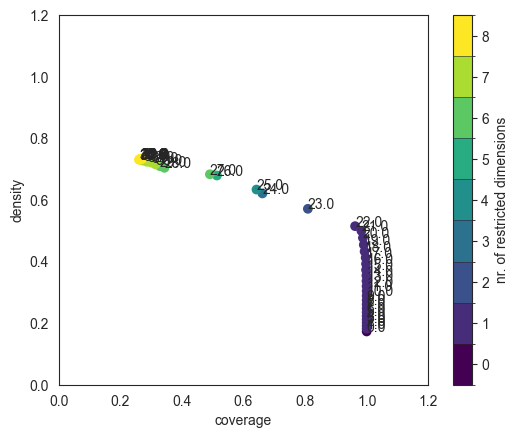

In [36]:
boxes_p133.show_tradeoff(annotated=True)
plt.show()

In [37]:
point_p133 = 24
boxes_p133.inspect(point_p133)

coverage       0.661654
density        0.621064
id            24.000000
k           2288.000000
mass           0.184200
mean           0.621064
n           3684.000000
res_dim        3.000000
Name: 24, dtype: float64

                          box 24                                        
                             min              max      qp value qp value
A.1_pfail               0.000042         0.323206           NaN      0.0
discount rate 2  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  3.994037e-12      NaN
discount rate 1  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  4.111080e-10      NaN


C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

Also for policy 133 the number of experiments within the box is relatively low (3684). It can again be concluded that policy 133 is a robust policy according to this analysis.

### Robustness Analysis for Policy 138

In [38]:
file_name_p138 = "data/dike_model_results_policy_policy_138.tar.gz"
experiments_p138, outcomes_p138 = load_results(file_name_p138)

In [39]:
experiments_cleaned_p138 = experiments_p138.iloc[:, :19]

In [40]:
damage_data = outcomes_p138['Expected Annual Damage']
casualties_data = outcomes_p138['Expected Number of Deaths']

damage_threshold = np.percentile(damage_data, 75)
casualties_threshold = np.percentile(casualties_data, 75)

# Create a combined condition
combined_condition = (damage_data > damage_threshold) & (casualties_data > casualties_threshold)

# Perform PRIM analysis using the combined condition
prim_alg = prim.Prim(experiments_cleaned_p138, combined_condition, threshold=0.7)
boxes_p138 = prim_alg.find_box()

C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '125.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible 

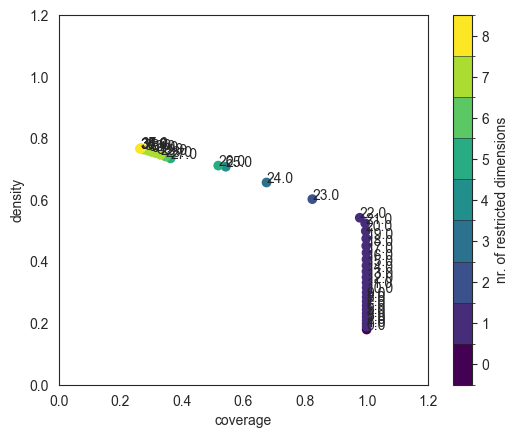

In [41]:
boxes_p138.show_tradeoff(annotated=True)
plt.show()

In [42]:
point_p138 = 24
boxes_p138.inspect(point_p138)

coverage       0.674944
density        0.656623
id            24.000000
k           2419.000000
mass           0.184200
mean           0.656623
n           3684.000000
res_dim        3.000000
Name: 24, dtype: float64

                          box 24                                        
                             min              max      qp value qp value
A.1_pfail               0.000042         0.323206           NaN      0.0
discount rate 2  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  2.579267e-14      NaN
discount rate 1  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  7.627859e-12      NaN


C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

Also for policy 138 the number of experiments within the box is relatively low (3684). It can again be concluded that policy 138 is a robust policy according to this analysis.

### Robustness Analysis for Policy 157

In [43]:
file_name_p157 = "data/dike_model_results_policy_policy_157.tar.gz"
experiments_p157, outcomes_p157 = load_results(file_name_p157)

In [44]:
experiments_cleaned_p157 = experiments_p157.iloc[:, :19]

In [45]:
damage_data = outcomes_p157['Expected Annual Damage']
casualties_data = outcomes_p157['Expected Number of Deaths']

damage_threshold = np.percentile(damage_data, 75)
casualties_threshold = np.percentile(casualties_data, 75)

# Create a combined condition
combined_condition = (damage_data > damage_threshold) & (casualties_data > casualties_threshold)

# Perform PRIM analysis using the combined condition
prim_alg = prim.Prim(experiments_cleaned_p157, combined_condition, threshold=0.7)
boxes_p157 = prim_alg.find_box()

C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '126.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible 

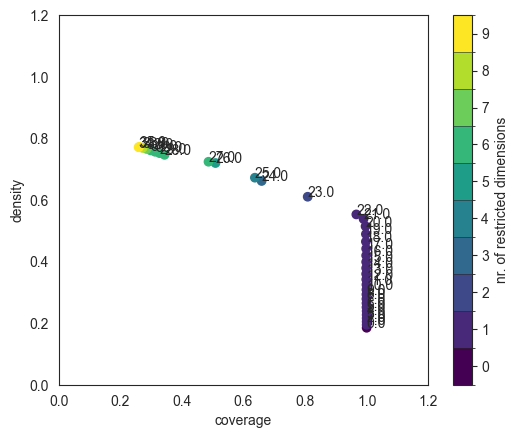

In [46]:
boxes_p157.show_tradeoff(annotated=True)
plt.show()

In [47]:
point_p157 = 24
boxes_p157.inspect(point_p157)

coverage       0.659005
density        0.661509
id            24.000000
k           2437.000000
mass           0.184200
mean           0.661509
n           3684.000000
res_dim        3.000000
Name: 24, dtype: float64

                          box 24                                        
                             min              max      qp value qp value
A.1_pfail               0.000042         0.323206           NaN      0.0
discount rate 2  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  5.982377e-13      NaN
discount rate 1  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}  7.328072e-11      NaN


C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 2.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

Also for policy 157 the number of experiments within the box is relatively low (3684). It can again be concluded that policy 157 is a robust policy according to this analysis.

## Maximum Regret

Another analysis to check the robustness of the policies is the maximum regret. Maximum regret measures the worst-case scenario in terms of the difference between the outcome of the chosen decision and the best possible outcome that could have been achieved with perfect foresight. 

In [3]:
final_name = "5_best_policies.csv"
final_policies = pd.read_csv(final_name)
final_policies

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Absolute Difference,policy_name
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,4.0,2.0,5.0,0.000000e+00,2.029929e+07,213300000.0,NaN,policy_34
1,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,5.0,4.0,3.0,3.867582e+06,0.000000e+00,455700000.0,NaN,policy_138
2,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,5.0,4.0,7.0,3.712002e+07,7.332080e+06,92100000.0,8.476792e+07,policy_133
3,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,2.0,5.0,7.0,1.504282e+07,0.000000e+00,213300000.0,2.133000e+08,policy_13
4,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5.0,4.0,6.0,3.633646e+06,2.640338e+07,30700000.0,4.296620e+06,policy_157


C:\Users\daann\AppData\Local\Temp\ipykernel_26240\2341284938.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regrets_df = pd.concat([regrets_df, pd.DataFrame({


<Figure size 1200x800 with 0 Axes>

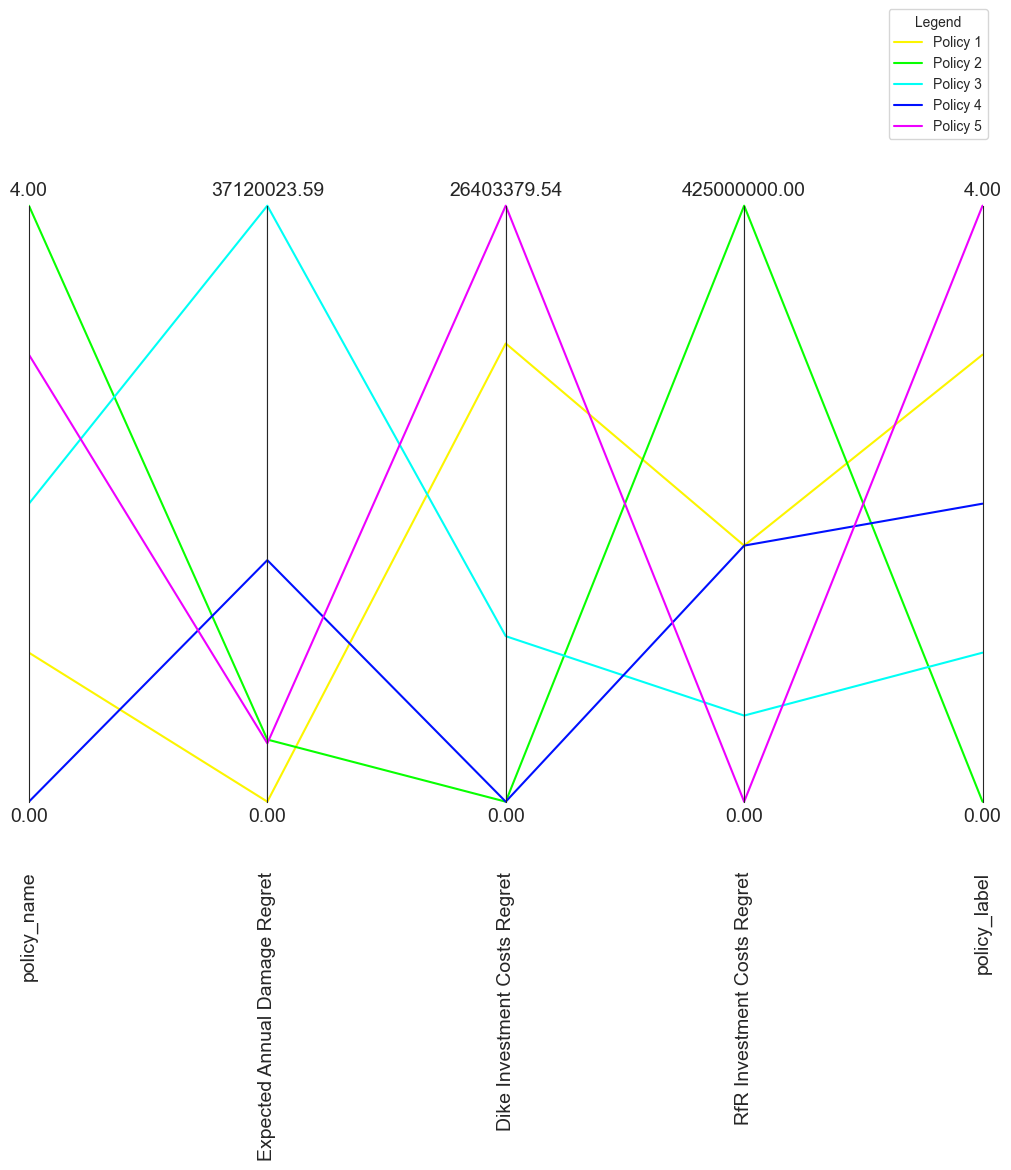

In [8]:
# Calculate the minimum value of each outcome
minimum_outcomes = {
    'Expected Annual Damage': final_policies['Expected Annual Damage'].min(),
    'Dike Investment Costs': final_policies['Dike Investment Costs'].min(),
    'RfR Investment Costs': final_policies['RfR Investment Costs'].min()
}

# Initialize an empty DataFrame to store the regrets
regrets_df = pd.DataFrame(columns=['policy_name','Expected Annual Damage Regret', 'Dike Investment Costs Regret', 'RfR Investment Costs Regret']) 

# Iterate through each policy and calculate the regret for each outcome
for index, row in final_policies.iterrows():
    policy = row['policy_name']
    ead_regret = row['Expected Annual Damage'] - minimum_outcomes['Expected Annual Damage']
    dic_regret = row['Dike Investment Costs'] - minimum_outcomes['Dike Investment Costs']
    rfr_regret = row['RfR Investment Costs'] - minimum_outcomes['RfR Investment Costs']
    
    # Append the regrets to the new DataFrame
    regrets_df = pd.concat([regrets_df, pd.DataFrame({
        'policy_name': [policy],
        'Expected Annual Damage Regret': [ead_regret],
        'Dike Investment Costs Regret': [dic_regret],
        'RfR Investment Costs Regret': [rfr_regret]
    })], ignore_index=True)

# Set the Policy column as the index
#regrets_df.set_index('policy_name', inplace=True)

regrets_df['policy_label'] = ['Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5']

colors = sns.color_palette("hsv", len(regrets_df))

legend_labels = regrets_df['policy_label'].tolist()

plt.figure(figsize=(12, 8))
limits = parcoords.get_limits(regrets_df)
axes = parcoords.ParallelAxes(limits)

# plot with a legend
for i, (index, row) in enumerate(regrets_df.iterrows()):
    axes.plot(row.to_frame().T, label=str(index), color=colors[i])
    
# Manually create the legend using plt.legend()
plt.legend(title='Legend', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='lower right')

# axes.plot(regrets_df)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
#axes.legend()

#plt.savefig('maximum_regret.png', bbox_inches='tight')

plt.show()

The maximum regret analysis shows significant potential costs associated with different policies. Policies that invest less in room for the river and dike investment costs could lead to relatively high damage costs in worst-case scenarios. Similarly, policies that invest heavily in dikes and room for the river could face high expenditure that may prove unnecessary if major floods do not occur.

In summary, the analysis shows that there are potential regrets associated with any policy and that no single policy is universally optimal. Ultimately, the policy choices made by Water Board 3 will also depend on the political context and priorities. 